### Stochastic gradient descent (SGD)

Huấn luyện mô hình linear regression theo SGD dùng từng mẫu dữ liệu để cập nhật bộ tham số. Công thức trong linear regression theo SGD tại: https://aivietnam.ai/courses/aisummer2019/lessons/batch-gradient-descent/



### Áp dụng cho bài toán dự đoán giá nhà 

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
data = genfromtxt('my_house_price_prediction.csv', delimiter=',')
m = data.shape[0]
X = data[:, 0]
y = data[:, 1:]
X_b = np.c_[np.ones((m, 1)), X]

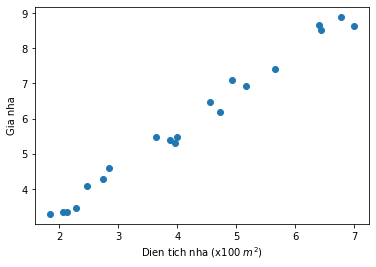

In [3]:
plt.scatter(X, y)
plt.xlabel('Dien tich nha (x100 $m^2$)')
plt.ylabel('Gia nha')
plt.show()

In [4]:
def stochastic_gradient_descent():
    n_epochs = 50
    learning_rate = 0.01
    
    # Khoi tao gia tri tham so
    thetas = np.random.randn(2, 1)
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        for i in range(m):
            # lay ngau nhien 1 sample
            random_index = np.random.randint(m)
            
            # dùng cách này sẽ giữ nguyên được số chiều của vecto 
            xi = X_b[random_index:random_index + 1]
            yi = y[random_index:random_index+1]
            
            # tinh output (o = x1*w1 + x2*w2)
            oi = np.dot(xi, thetas)
            
            # tinh loss li (l = (output - y)^2)
            li = (oi - yi) **2
            
            # tinh gradient cho loss
            g_li = 2 * (oi - yi)
            
            # Tinh gradient (g_x1 = x1*g_li) va (g_x2 = x2*g_li)
            gradients = np.dot(xi.T, g_li)
            
            # update gia tri theta
            thetas = thetas - learning_rate * gradients
            
            # logging
            thetas_path.append(thetas)
            losses.append(li[0][0])
            
    return thetas_path, losses

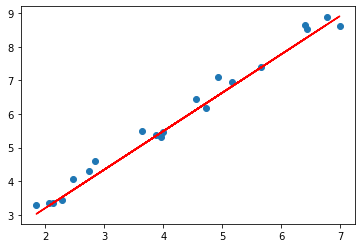

In [5]:
bgd_thetas, losses = stochastic_gradient_descent()

plt.scatter(X, y)
data_y = X*bgd_thetas[-1][1] + bgd_thetas[-1][0]
plt.plot(X, data_y, color='r')
plt.show()

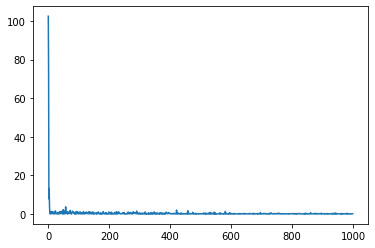

In [6]:
plt.plot(losses[:])